## Campaña de Marketing Bancario
### Comprensión empresarial

Los depósitos a largo plazo permiten a los bancos retener dinero durante un período de tiempo específico, lo que permite al banco utilizar ese dinero para mejorar sus inversiones. Las campañas de marketing de este producto se basan en llamadas telefónicas. Si un usuario no se encuentra disponible en un momento dado, entonces se le volverá a llamar de nuevo en otro momento.

### Descripción del problema

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contratará o no un depósito a largo plazo.

## Contenido del proyecto
### EDA
* [0. Importar librerias](#c0)
* [1. Cargar el conjunto de datos](#c1)
* [2. Limpieza de datos](#c2)
    * [2.1 Identificar las variables](#s21)
    * [2.2 Identificar duplicados y valores nulos](#s22)
    * [2.3 Eliminar información irrelevante](#s23)
* [3. Análisis Univariante](#c3)
    * [3.1 Análisis categórico](#s31)
    * [3.2 Análisis numérico](#s32) 
* [4. Análisis Multivariante](#c4)
    * [4.1 Análisis Categórico-Categórico](#s41)
    * [4.2 Análisis Numérico-Numérico](#s42)
    * [4.3 Combinaciones de clase con predictoras](#s43)
    * [4.4 Análisis de correlaciones](#s44)
* [5. Ingeniería de características](#c5)
    * [5.1 Valores atípicos](#s51)
    * [5.2 ](#s52)
    * [5.3 ](#s53)
* [6. Análisis de valores faltantes](#c6)
    * [](#s61)
    * [](#s62)
    * [](#s63)
### Machine Learning 
* [7.1 Decision Making: Which is the best dataset?](#s71)
* [7.2 Model Optimization](#s72)

### 0. Importar librerias

In [59]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import json
from pickle import dump

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

### 1. Cargar el conjunto de datos

In [60]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
total_data = pd.read_csv(url, sep=";")  
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 2. Limpieza de datos
#### 2.1 Identificar las variables

- *age.* Edad del cliente (numérico)
- *job.* Tipo de trabajo (categórico)
- *marital.* Estado civil (categórico)
- *education.* Nivel de educación (categórico)
- *default.* ¿Tiene crédito actualmente? (categórico)
- *housing.* ¿Tiene un préstamo de vivienda? (categórico)
- *loan.* ¿Tiene un préstamo personal? (categórico)
- *contact.* Tipo de comunicación de contacto (categórico)
- *month.* Último mes en el que se le ha contactado (categórico)
- *day_of_week.* Último día en el que se le ha contactado (categórico)
- *duration.* Duración del contacto previo en segundos (numérico)
- *campaign.* Número de contactos realizados durante esta campaña al cliente (numérico)
- *pdays.* Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
- *previous.* Número de contactos realizados durante la campaña anterior al cliente (numérico)
- *poutcome.* Resultado de la campaña de marketing anterior (categórico)
- *emp.var.rate.* Tasa de variación del empleo. Indicador trimestral (numérico)
- *cons.price.idx.* Índice de precios al consumidor. Indicador mensual (numérico)
- *cons.conf.idx.* Índice de confianza del consumidor. Indicador mensual (numérico)
- *euribor3m.* Tasa EURIBOR 3 meses. Indicador diario (numérico)
- *nr.employed.* Número de empleados. Indicador trimestral (numérico)
- *y. TARGET.* El cliente contrata un depósito a largo plazo o no (categórico)

#### 2.2 Identificar duplicados y valores nulos

In [61]:
total_data = total_data.drop_duplicates()
print("Antes:", total_data.shape)
print("Después:", total_data.shape)

Antes: (41176, 21)
Después: (41176, 21)


- No existe ningún duplicado

In [62]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

- En este Dataset hay 21 columnas
- No hay ningún valor nulo

#### 2.3 Eliminar información irrelevante

In [63]:
total_data.drop(['contact', 'month', 'day_of_week', 'duration', 'previous', 'nr.employed', 'pdays'], axis = 1, inplace = True)
total_data.head()

,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,1,nonexistent,1.1,93.994,-36.4,4.857,no


### 3. Análisis univariante
#### 3.1 Análisis categórico

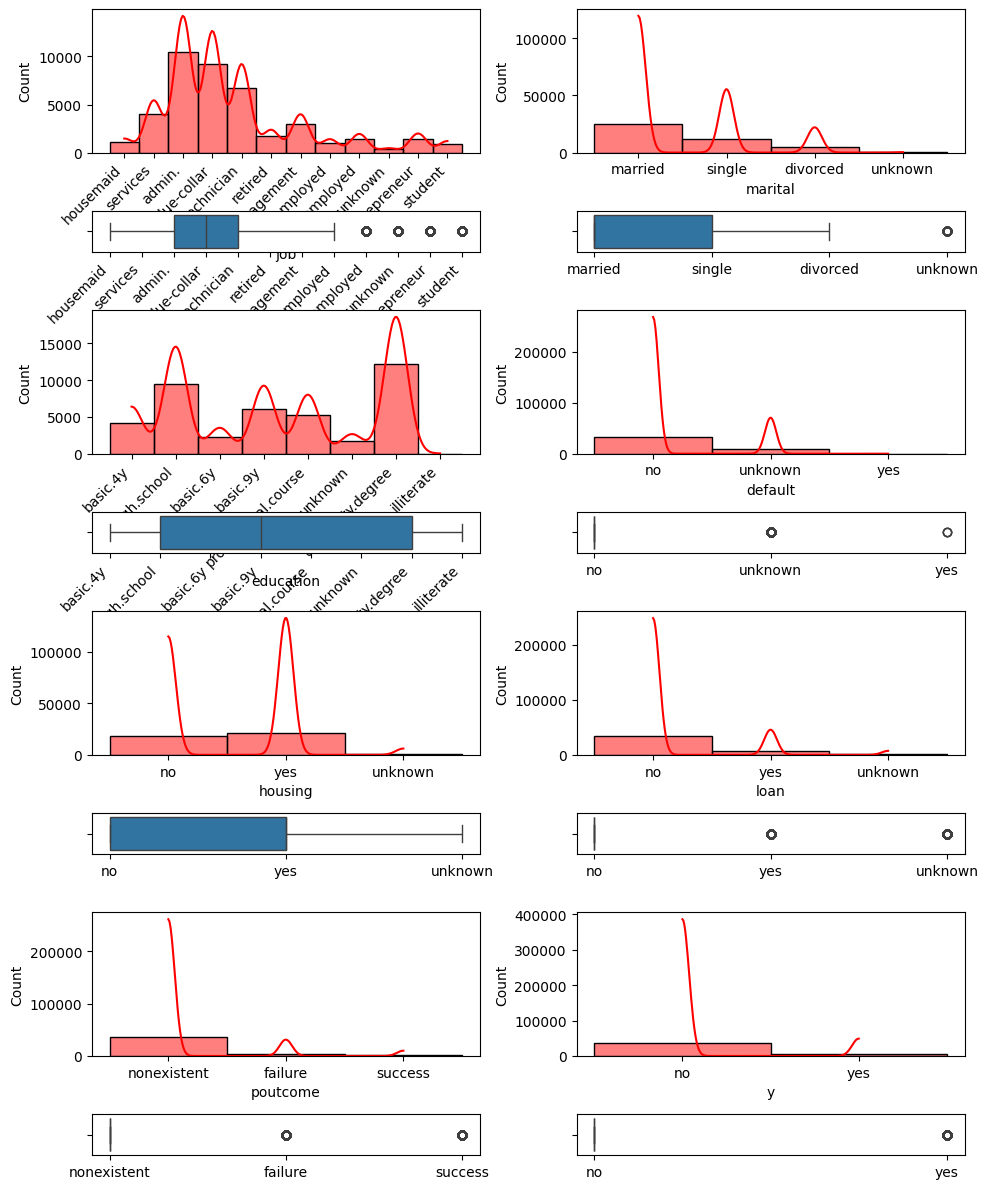

In [64]:
fig, axis = plt.subplots(8, 2, figsize=(10, 12), gridspec_kw={'height_ratios': [7, 2, 7, 2, 7, 2, 7, 2]})

sns.histplot(ax = axis[0,0], data = total_data, x = 'job', kde=True, color = 'red')
sns.boxplot(ax = axis[1,0], data = total_data, x='job').set(xlabel = None)

sns.histplot(ax = axis[0,1], data = total_data, x = 'marital', kde = True, color = 'red')
sns.boxplot(ax = axis[1,1], data = total_data, x='marital').set(xlabel = None)

sns.histplot(ax = axis[2,0], data = total_data, x = 'education', kde = True, color = 'red')
sns.boxplot(ax = axis[3,0], data = total_data, x='education').set(xlabel = None)

sns.histplot(ax = axis[2,1], data = total_data, x = 'default', kde = True, color = 'red')
sns.boxplot(ax = axis[3,1], data = total_data, x='default').set(xlabel = None)

sns.histplot(ax = axis[4, 0], data = total_data, x = 'housing', kde = True, color = 'red')
sns.boxplot(ax = axis[5,0], data = total_data, x='housing').set(xlabel = None)

sns.histplot(ax = axis[4,1], data = total_data, x = 'loan', kde = True, color = 'red')
sns.boxplot(ax = axis[5,1], data = total_data, x='loan').set(xlabel = None)

sns.histplot(ax = axis[6,0], data = total_data, x = 'poutcome', kde = True, color = 'red')
sns.boxplot(ax = axis[7,0], data = total_data, x='poutcome').set(xlabel = None)

sns.histplot(ax = axis[6,1], data = total_data, x = 'y', kde = True, color = 'red')
sns.boxplot(ax = axis[7,1], data = total_data, x='y').set(xlabel = None)

plt.tight_layout()
plt.setp(axis[0,0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axis[1,0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axis[2,0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axis[3,0].get_xticklabels(), rotation=45, ha='right')
plt.show()

- ***Job***: Destacan 3 grupos de tipos de trabajo con respecto a los demás, pero lo más relevante que sacamos de aquí es que hay poca gente sin empleo.
- ***Marital***: La mayoria de clientes están casados, algo que podría ayudar a que contrate el depósito a largo plazo.
- ***Education***: Se observa que la matoría de los clientes tienen estudios universitarios.
- ***Default***: No hay nadie que tenga un crédito actualmente, ya sea o por que saben que no o bien porque no conocen la respuesta.
- ***Housing***:Destacan por poco los clientes que sí tienen un préstamo de vivienda.
- ***Loan***: La mayoría no tienen un préstamo personal.
- ***Poutcome***: Viendo los resultados de la campaña anterior se puede observar que, o bien son clientes nuevos la mayoría, o no ha habido contacto. Hay muy pocos "success".
- ***Y***: Practicamente nadie contrata un depósito a largo plazo.

#### 3.2 Análisis numérico

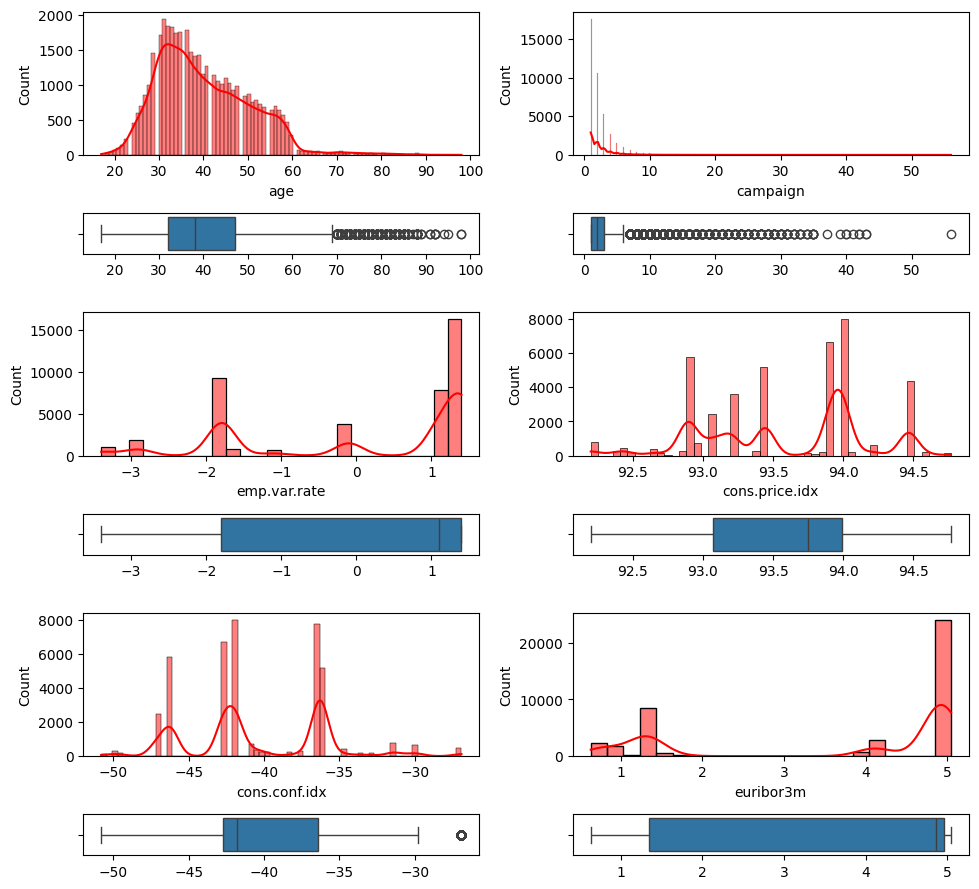

In [65]:
fig, axis = plt.subplots(8, 2, figsize=(10, 12), gridspec_kw={'height_ratios': [7, 2, 7, 2, 7, 2, 7, 2]})

sns.histplot(ax = axis[0,0], data = total_data, x = 'age', kde=True, color = 'red')
sns.boxplot(ax = axis[1,0], data = total_data, x='age').set(xlabel = None)

sns.histplot(ax = axis[0,1], data = total_data, x = 'campaign', kde = True, color = 'red')
sns.boxplot(ax = axis[1,1], data = total_data, x='campaign').set(xlabel = None)

sns.histplot(ax = axis[2,0], data = total_data, x = 'emp.var.rate', kde = True, color = 'red')
sns.boxplot(ax = axis[3,0], data = total_data, x='emp.var.rate').set(xlabel = None)

sns.histplot(ax = axis[2,1], data = total_data, x = 'cons.price.idx', kde = True, color = 'red')
sns.boxplot(ax = axis[3,1], data = total_data, x='cons.price.idx').set(xlabel = None)

sns.histplot(ax = axis[4, 0], data = total_data, x = 'cons.conf.idx', kde = True, color = 'red')
sns.boxplot(ax = axis[5,0], data = total_data, x='cons.conf.idx').set(xlabel = None)

sns.histplot(ax = axis[4,1], data = total_data, x = 'euribor3m', kde = True, color = 'red')
sns.boxplot(ax = axis[5,1], data = total_data, x='euribor3m').set(xlabel = None)

plt.tight_layout()
fig.delaxes(axis[6,0])
fig.delaxes(axis[6,1])
fig.delaxes(axis[7,0])
fig.delaxes(axis[7,1])

plt.show()


- ***Age***: la mayoría de los clientes rondan los 30 años.
- ***Campaign***: se han realizado 1 o 2 contactos durante esta campaña en la mayoría de los casos.
- ***emp.var.rate***: la tasa de variación del empleo es, en su mayoría, de 1.
- ***cons.price.idx***: el indice de precios al consumidor es muy estable.
- ***cons.conf.idx***: el indice de confianza del consumidor es negativo.
- ***euribor3m***: la tasa en su mayoría es de 5.


### 4. Analisis multivariante.
#### 4.1 Categórico-Categórico.

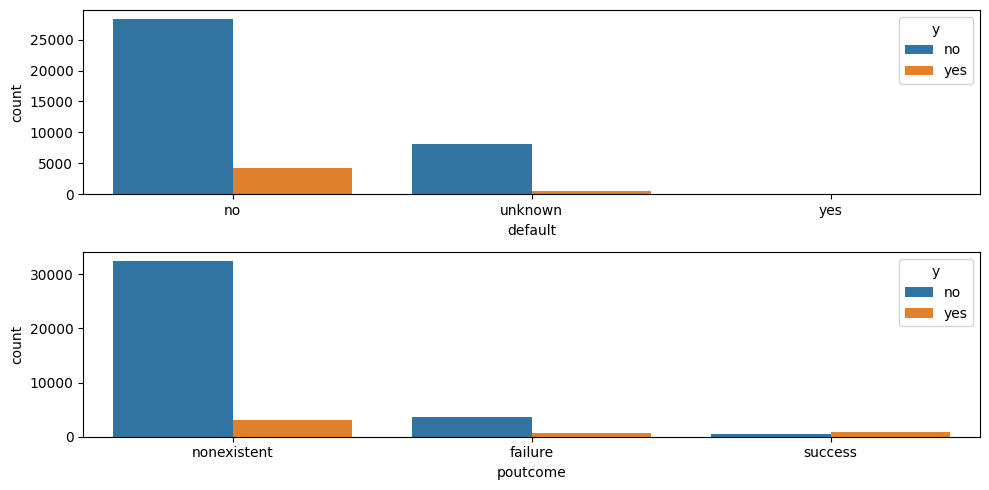

In [66]:
fig, axis = plt.subplots(2, figsize = (10, 5))

sns.countplot(ax = axis[0], data = total_data, x = "default", hue = "y")
sns.countplot(ax = axis[1], data = total_data, x = "poutcome", hue = "y")
plt.tight_layout()

plt.show()

Comparamos el "default" y el "poutcome" con nuestro target "y". Se observa lo siguiente:
- ***Primer gráfico***: Como se puede ver, sólo hay datos en las opciones de "no" y de "unknown"; y un pequeño porcentaje de los que no tienen un crédito si querrían un depósito.
- ***Segundo gráfico***: En este segundo counptplot se observa que la gran mayoria de los clientes de la campaña anterior no querían el depósito. No parece que haya relación entre las campañas y la contratación del depósito.

Lo importante a tener en cuenta a raiz de los datos es saber quienes no tienen crédito pero sí quieren el depósito.

#### 4.2 Análisis Numérico-Numérico

Vamos a factorizar la columna 'y' ya que es nuestro target para poder graficarla junto a los demás valores numéricos y compararlos.

In [67]:
total_data["y_n"] = pd.factorize(total_data["y"])[0]
total_data[["y_n", "y"]]

,y_n,y
0,0,no
1,0,no
2,0,no
3,0,no
4,0,no
...,...,...
41183,1,yes
41184,0,no
41185,0,no
41186,1,yes


In [68]:
total_data[["y_n", "y"]].drop_duplicates()

,y_n,y
0,0,no
75,1,yes


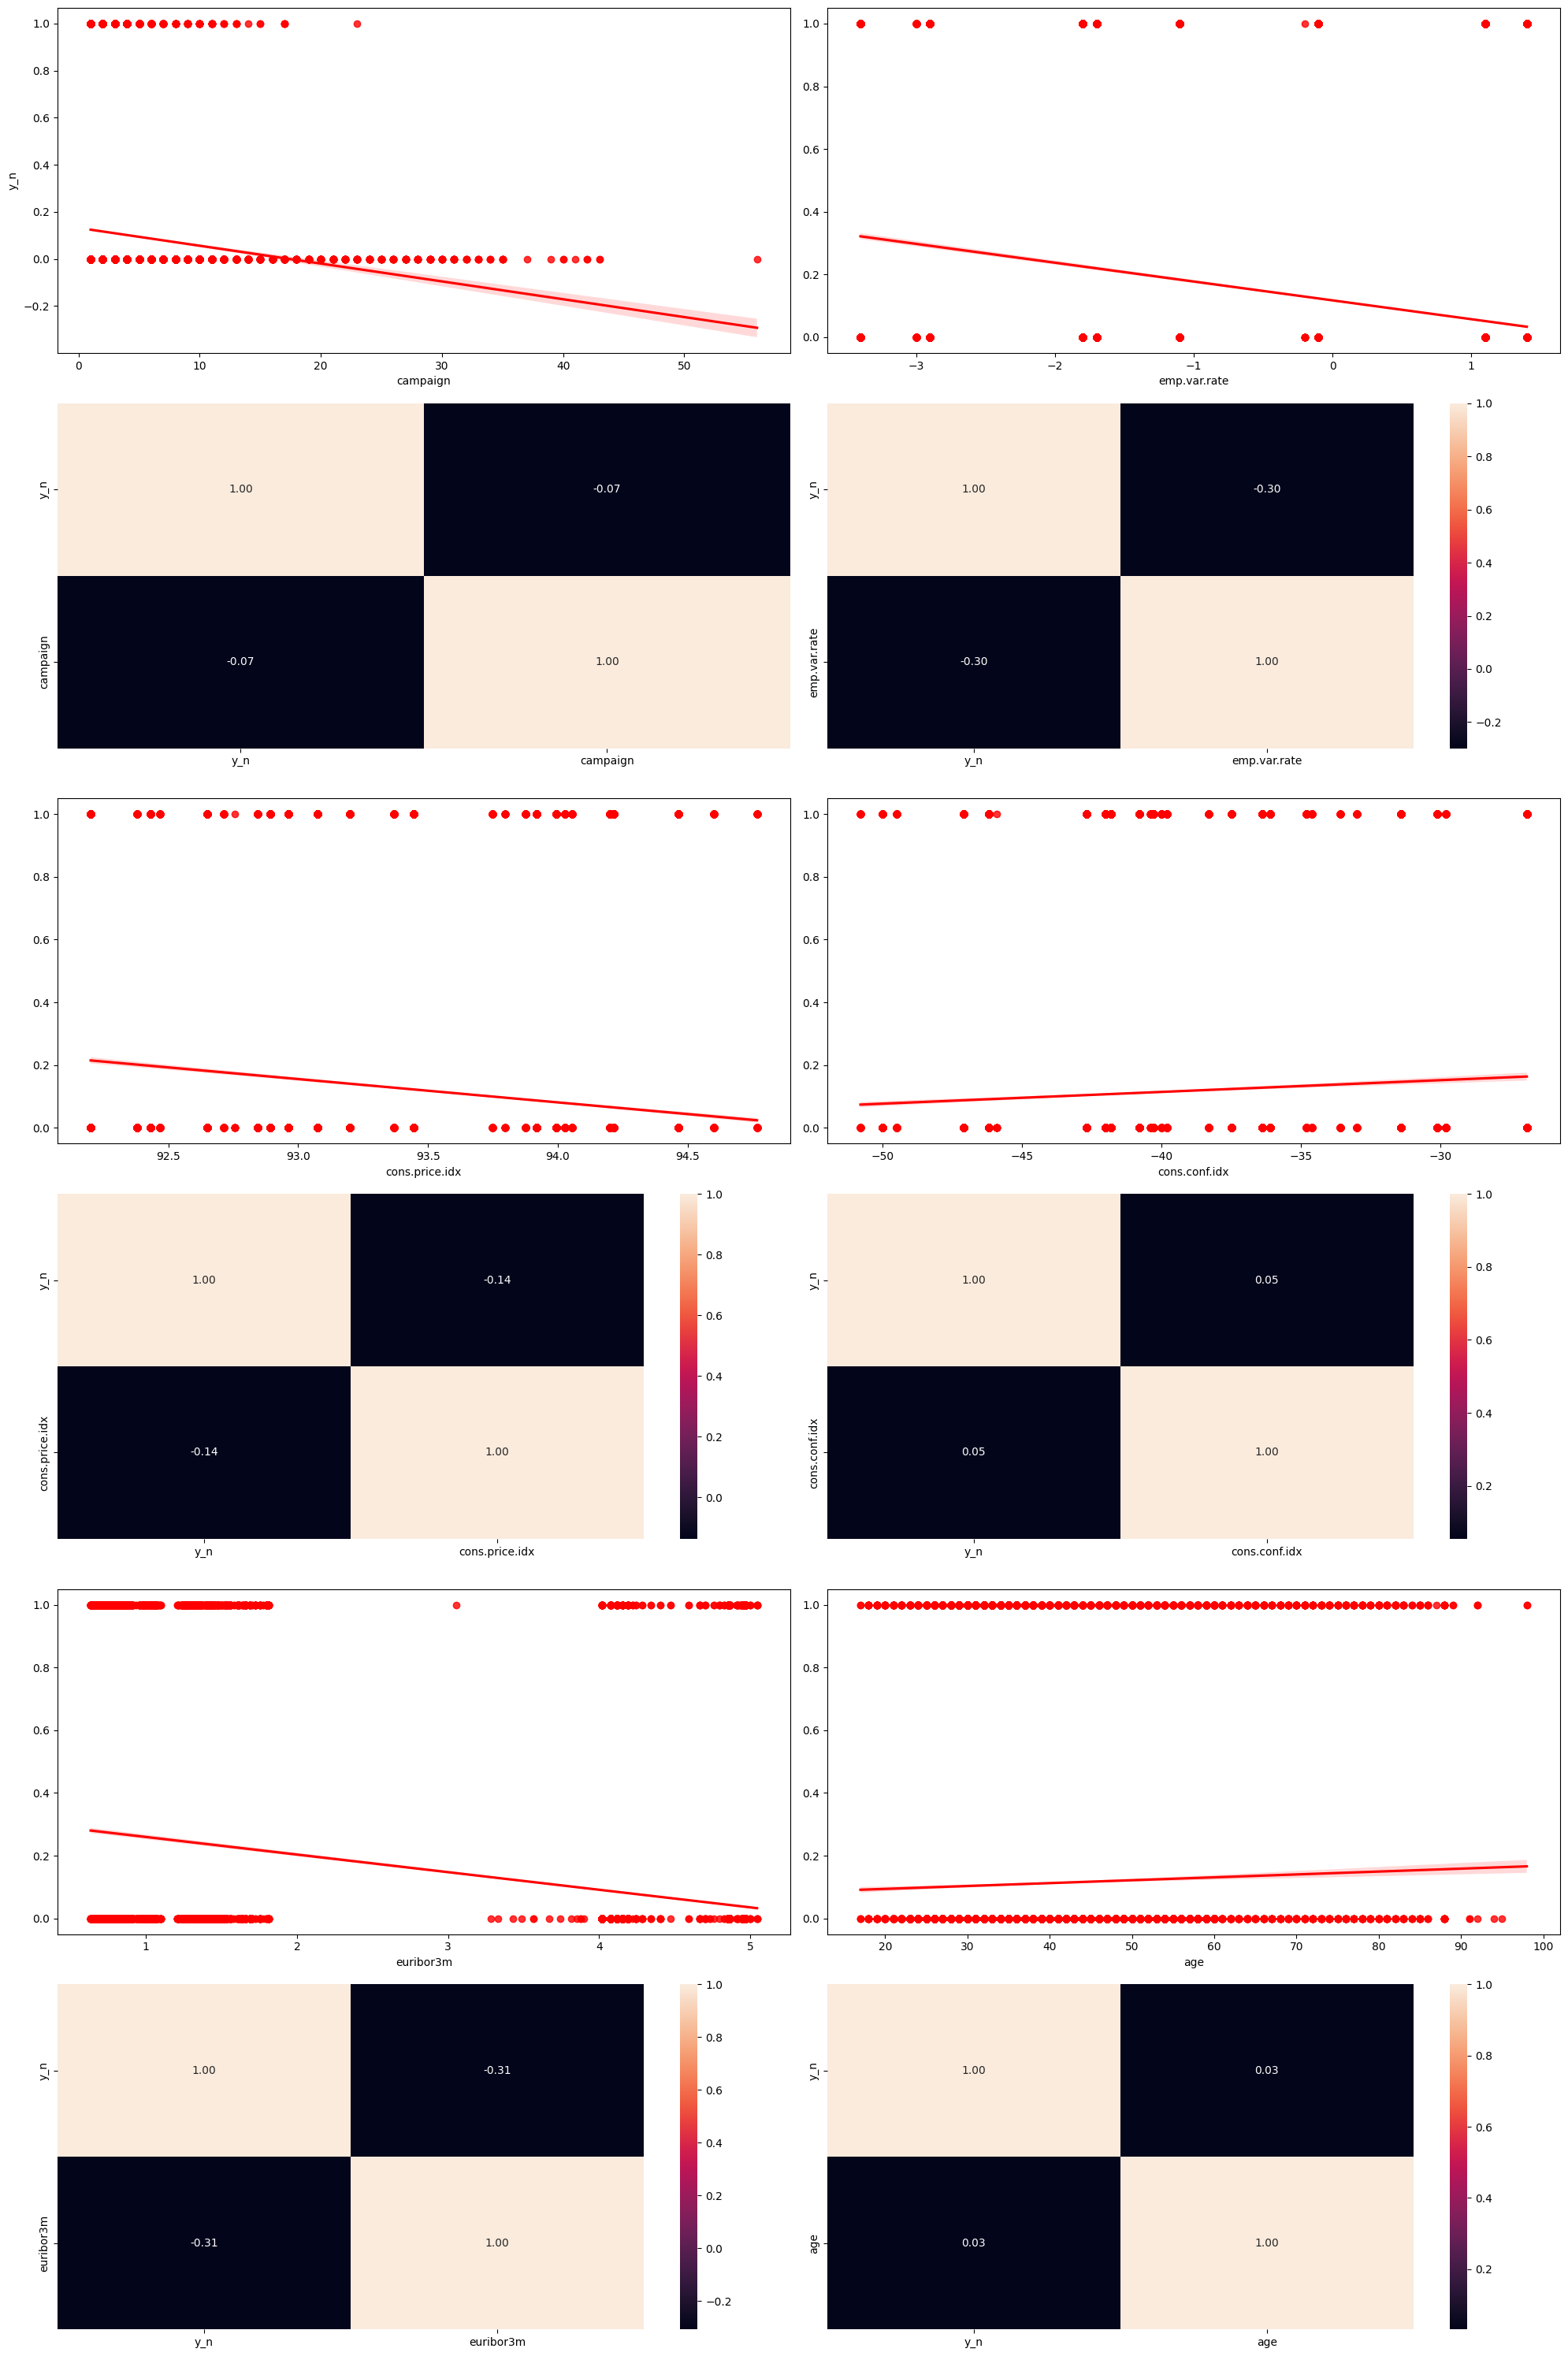

In [69]:
fig, axis = plt.subplots(6, 2, figsize = (20, 30))

sns.regplot(ax = axis[0, 0], data = total_data, x = "campaign", y = "y_n", color = 'red')
sns.heatmap(total_data[["y_n", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "emp.var.rate", y = "y_n", color = 'red').set(ylabel = None)
sns.heatmap(total_data[["y_n", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "cons.price.idx", y = "y_n", color = 'red').set(ylabel = None)
sns.heatmap(total_data[["y_n", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)


sns.regplot(ax=axis[2, 1], data=total_data, x="cons.conf.idx", y="y_n", color = 'red').set(ylabel=None)
sns.heatmap(total_data[["y_n", "cons.conf.idx"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1]).set(ylabel=None)

sns.regplot(ax=axis[4, 0], data=total_data, x="euribor3m", y="y_n", color = 'red').set(ylabel=None)
sns.heatmap(total_data[["y_n", "euribor3m"]].corr(), annot=True, fmt=".2f", ax=axis[5, 0]).set(ylabel=None)

sns.regplot(ax=axis[4, 1], data=total_data, x="age", y="y_n", color = 'red').set(ylabel=None)
sns.heatmap(total_data[["y_n", "age"]].corr(), annot=True, fmt=".2f", ax=axis[5, 1]).set(ylabel=None)

plt.tight_layout()

plt.show()

Se puede observar que:
- Entre "y" y "emp.var.rate" si existe algo de relación, aunque es muy pequeña.
- Entre "y" y "euribor3m" también existe una pequeña correlación que puede ser significativa.

#### 4.3 Combinaciones de clase con predictoras

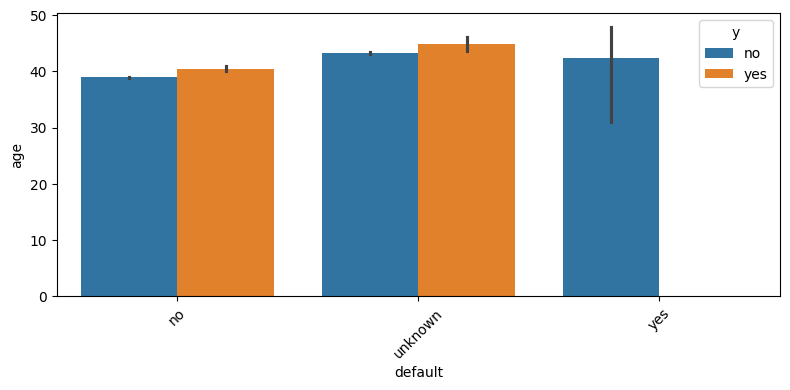

In [70]:
fig, axis = plt.subplots(figsize = (8, 4))

sns.barplot(data = total_data, x = "default", y = "age", hue = "y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observamos los siguientes puntos:
- La media de la edad está en torno a los 40 años para todas las opciones.
- La diferencia entre los que sí contratarían un depósito y los que no es mínima, siendo practicamente un 50% las dos.
- Ningún cliente que sí tiene un crédito contrataría un depósito.

#### 4.4 Análisis de correlaciones

Factorizamos todas las variables categóricas.

In [71]:
total_data["default_n"] = pd.factorize(total_data["default"])[0]
total_data[["default_n", "default"]]

,default_n,default
0,0,no
1,1,unknown
2,0,no
3,0,no
4,0,no
...,...,...
41183,0,no
41184,0,no
41185,0,no
41186,0,no


In [72]:
total_data[["default_n", "default"]].drop_duplicates()

,default_n,default
0,0,no
1,1,unknown
21580,2,yes


In [73]:
total_data["housing_n"] = pd.factorize(total_data["housing"])[0]
total_data[["housing_n", "housing"]]

,housing_n,housing
0,0,no
1,0,no
2,1,yes
3,0,no
4,0,no
...,...,...
41183,1,yes
41184,0,no
41185,1,yes
41186,0,no


In [74]:
total_data[["housing_n", "housing"]].drop_duplicates()

,housing_n,housing
0,0,no
2,1,yes
29,2,unknown


In [75]:
total_data["loan_n"] = pd.factorize(total_data["loan"])[0]
total_data[["loan_n", "loan"]]

,loan_n,loan
0,0,no
1,0,no
2,0,no
3,0,no
4,1,yes
...,...,...
41183,0,no
41184,0,no
41185,0,no
41186,0,no


In [76]:
total_data[["loan_n", "loan"]].drop_duplicates()

,loan_n,loan
0,0,no
4,1,yes
29,2,unknown


In [77]:
total_data["poutcome_n"] = pd.factorize(total_data["poutcome"])[0]
total_data[["poutcome_n", "poutcome"]]

,poutcome_n,poutcome
0,0,nonexistent
1,0,nonexistent
2,0,nonexistent
3,0,nonexistent
4,0,nonexistent
...,...,...
41183,0,nonexistent
41184,0,nonexistent
41185,0,nonexistent
41186,0,nonexistent


In [78]:
total_data[["poutcome_n", "poutcome"]].drop_duplicates()

,poutcome_n,poutcome
0,0,nonexistent
24013,1,failure
24108,2,success


Una vez factorizadas, realizamos el mapa de calor de todas las variables:

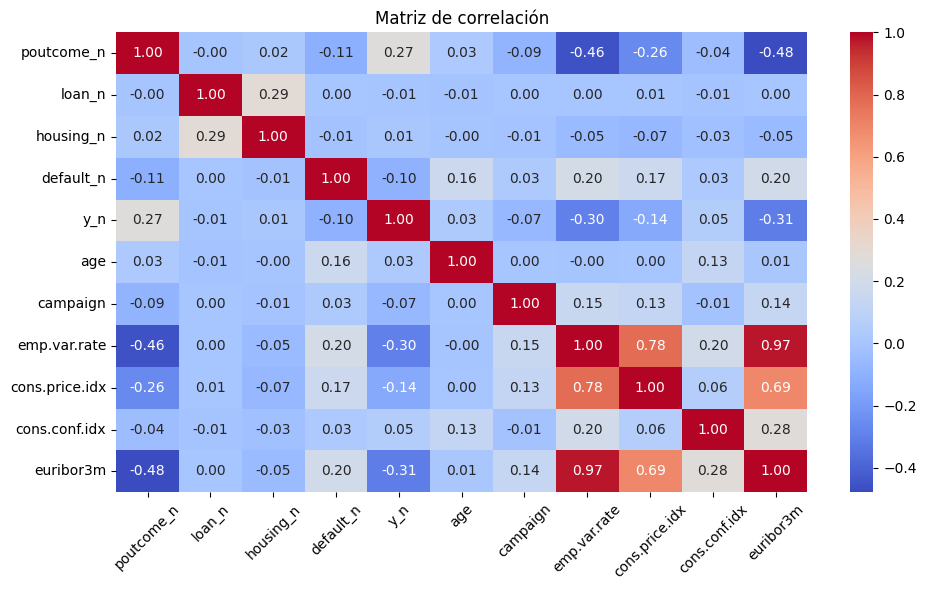

In [80]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["poutcome_n", "loan_n", "housing_n", "default_n", "y_n", "age", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]].corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Matriz de correlación")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Aquí podemos observar grandes correlaciones entre variables, y las más significativas son las siguientes:
- 0.97 de correlación entre euribor3m y emp.var.rate.
- 0.95 de correlación entre euribor3m y nr.employed.
- 0.91 de correlación entre nr.employed y emp.var.rate.
- 0.78 de correlación entre cons.price.idx y emp.var.rate.
- 0.69 de correlación entre euribor3m y cons.price.idx.
- 0.48 de correlación entre euribor3m y poutcome.
- 0.46 de correlación entre emp.var.rate y poutcome.

A continuación graficamos el Pairplot.

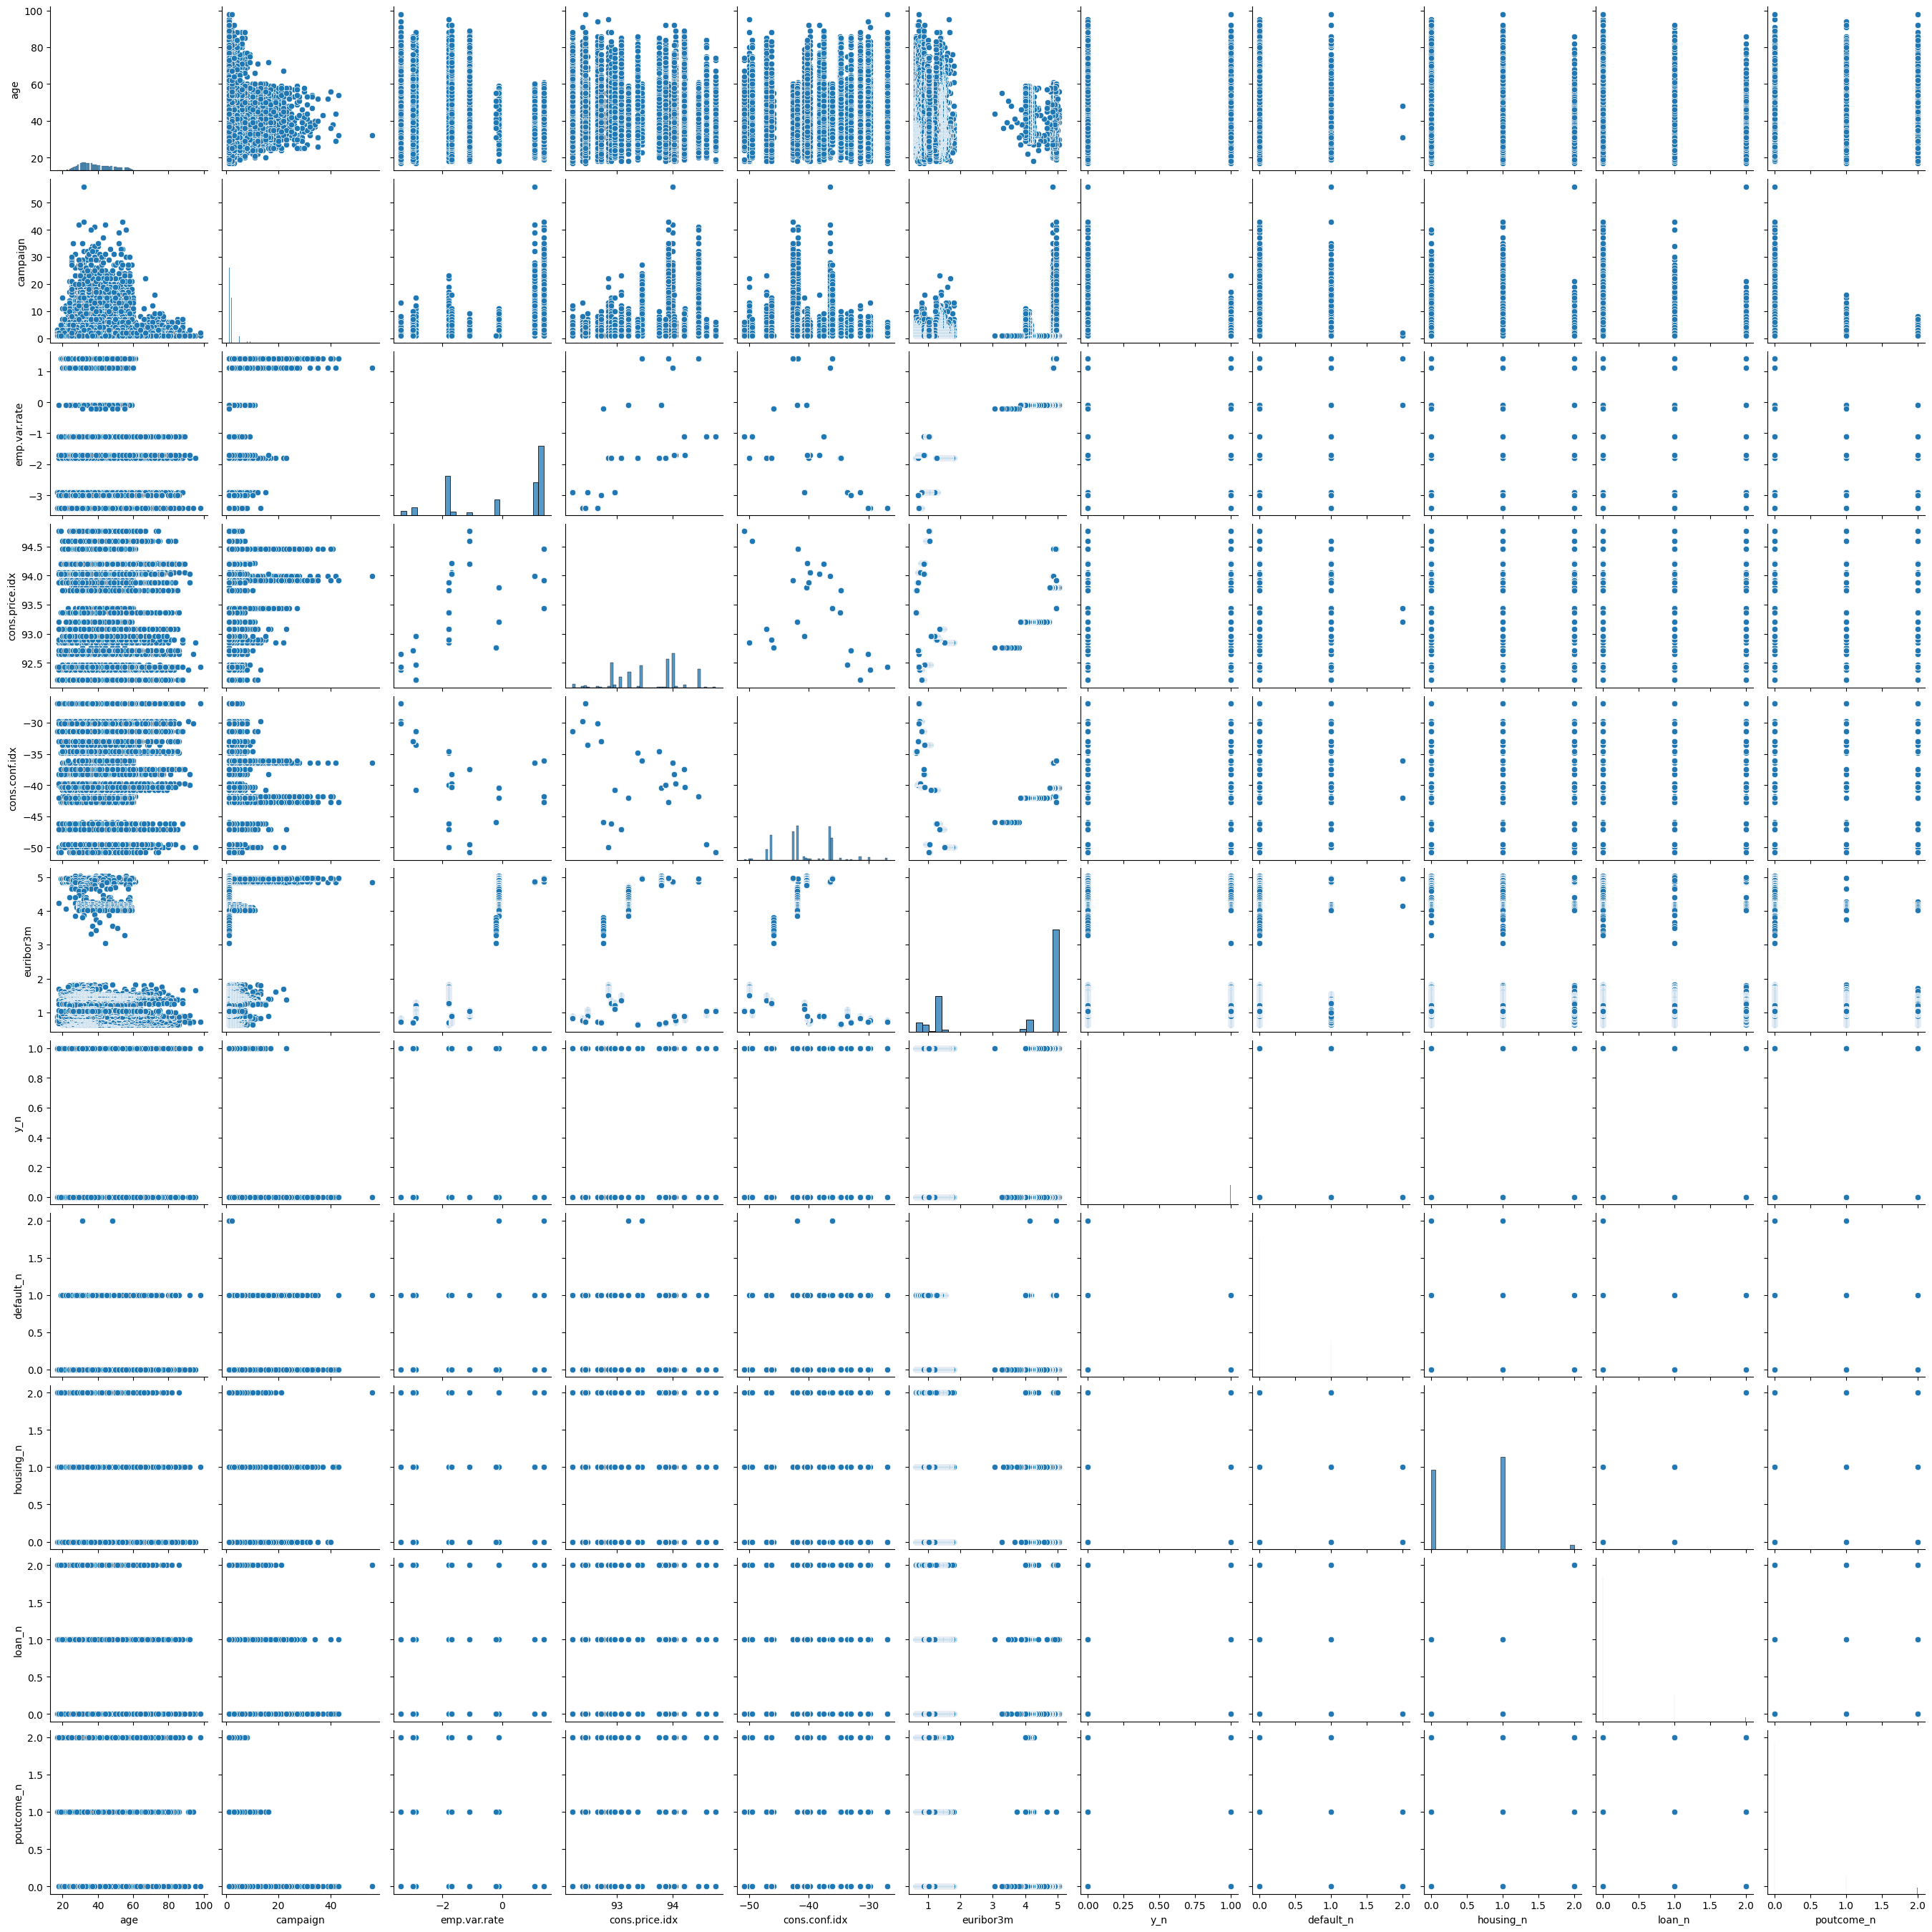

In [81]:
sns.pairplot(data = total_data)

### 5. Igneniería de características

#### 5.1 Valores atípicos

Rescatamos los "boxplot" que ya habíamos graficado anteriormente que tenían Outliers, que eran los de "age" y "campaign"

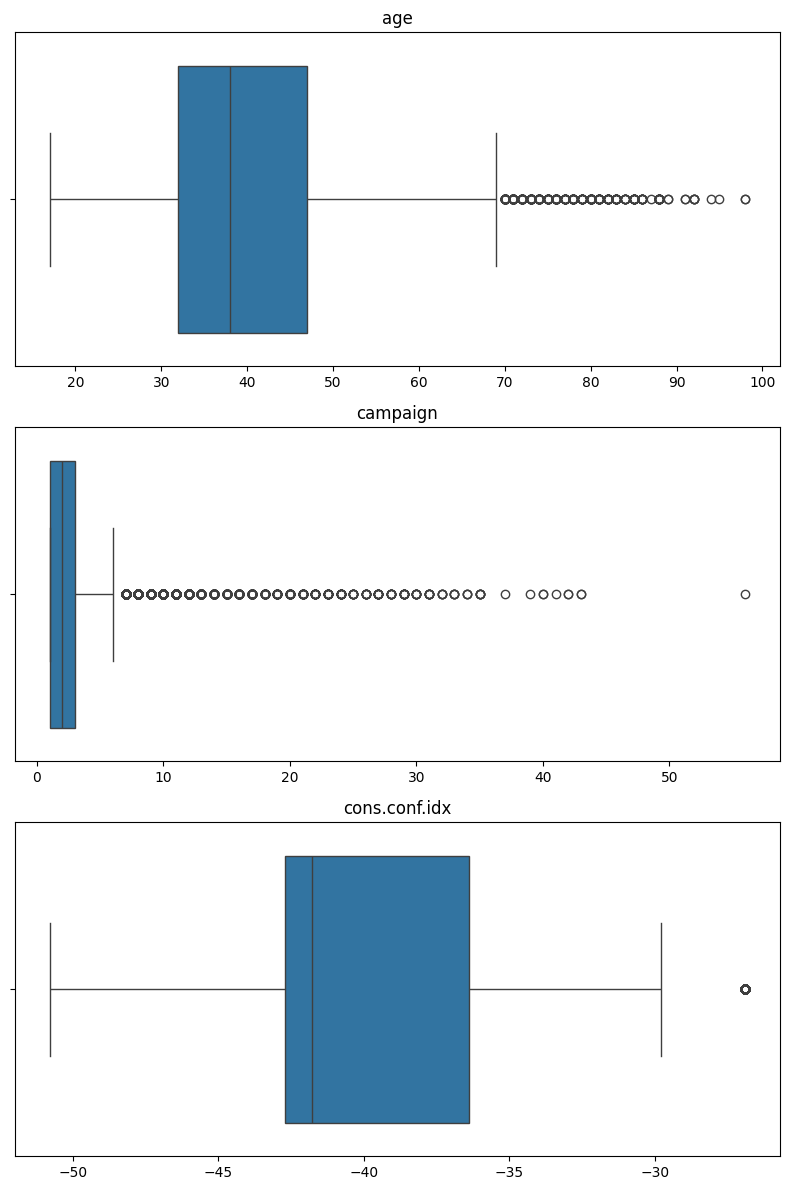

In [129]:
fig, axis = plt.subplots(3, 1, figsize=(8, 12), gridspec_kw={'height_ratios': [2, 2, 2]})

sns.boxplot(ax = axis[0], data = total_data, x = 'age').set(xlabel = None)

sns.boxplot(ax = axis[1], data = total_data, x = 'campaign').set(xlabel = None)

sns.boxplot(ax = axis[2], data = total_data, x = 'cons.conf.idx').set(xlabel = None)

axis[0].set_title('age')
axis[1].set_title('campaign')
axis[2].set_title('cons.conf.idx')

plt.tight_layout()
plt.show()

In [132]:
numerical_columns = [
  "age", 
  "emp.var.rate", 
  "cons.price.idx", 
  "euribor3m",  
  "campaign",
  ]

for column in numerical_columns:
  stats = total_data[column].describe()
  iqr = stats["75%"] - stats["25%"]
  upper_limit = stats["75%"] + 1.5 * iqr
  lower_limit = stats["75%"] - 1.5 * iqr
  if lower_limit < 0:
    lower_limit = 0
    print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 6.2 y 0, con un rango intercuartílico de 3.2
Los límites superior e inferior para la búsqueda de outliers son 10.39 y 0, con un rango intercuartílico de 3.62
